# Nuclear Game - Analysis
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

This document describes the workflow to analyze data from segmented images that were previously processed by `insert tool name`. We will show how to import, visualise, filter and cluster the data using robust, simple-to-use functions. Many of these functions take up positional arguments that can be modified. To display the usage of these functions, run `help(name_of_function)`.

We begin by importing the `tool name` module.

In [28]:
import ngtools.analyzer as ngt

## Analyzor object

We provide an Analyzor object class that facilitates storage of nuclei segmented data and its downstream processing. 

In [29]:
path_to_experiments = "/Users/m./Desktop/Somya/Day14_INs"
nga = ngt.NuclearGame_Analyzer(path_to_experiments)

## Accessing NGA data

In [30]:
nga.dim()

(4380, 41)


In [31]:
nga.nrow()
nga.ncol()

4380
41


In [32]:
nga.colnames()

Index(['cellID', 'avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter',
       'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity',
       'solidity', 'x_pos', 'y_pos', 'angle', 'imageID',
       'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi',
       'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi',
       'total_intensity_internal_ring_dapi',
       'total_intensity_external_ring_dapi', 'total_intensity_dapi',
       'avg_intensity_beta3', 'total_intensity_beta3', 'avg_intensity_rfp',
       'total_intensity_rfp', 'avg_intensity_laminB1',
       'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1',
       'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'dna_peaks', 'dna_dots',
       'dna_dots_size_median', 'spatial_entropy', 'beta3_group', 'rfp_group',
       'laminB1_group', 'iNs', 'experiment', 'path2ong'],
      dtype='object')


In [33]:
nga.showData()

      cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0          1                 787            34                 28        12.7   
1          2                 977           101                 39        14.5   
2          3                 856           254                 66        26.6   
3          4                 374            58                 30         9.7   
4          5                1010           124                 43        14.7   
...      ...                 ...           ...                ...         ...   
4375     150                 673           130                 43        14.9   
4376     151                1115            77                 34        12.4   
4377     152                1089            91                 37        13.0   
4378     153                1945            39                 23         8.2   
4379     154                 765            37                 27        11.5   

      minor_axis  axes_rati

In [34]:
nga.showData(vars = ['cellID', 'avg_intensity_rfp'])

      cellID  avg_intensity_rfp
0          1                336
1          2                438
2          3                312
3          4               2856
4          5               2309
...      ...                ...
4375     150                392
4376     151                660
4377     152                336
4378     153               1033
4379     154                590

[4380 rows x 2 columns]


## Plotting data

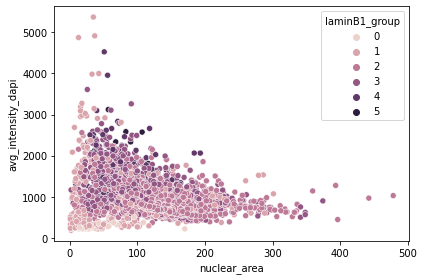

In [35]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi", hue = "laminB1_group")

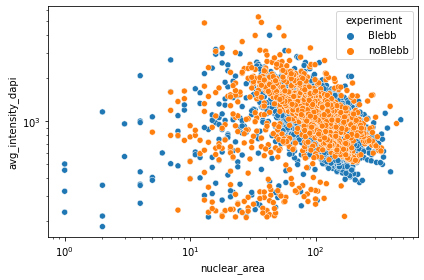

In [36]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi", x_trans = "log", y_trans = "log", hue = "experiment")

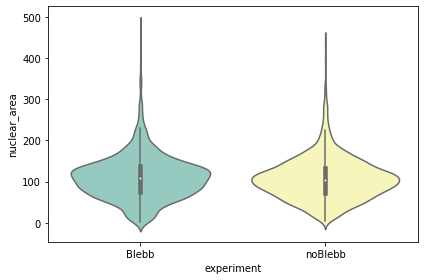

In [37]:
nga.plotData(x="experiment", y = "nuclear_area", plot_type = "violin")

### Center DAPI

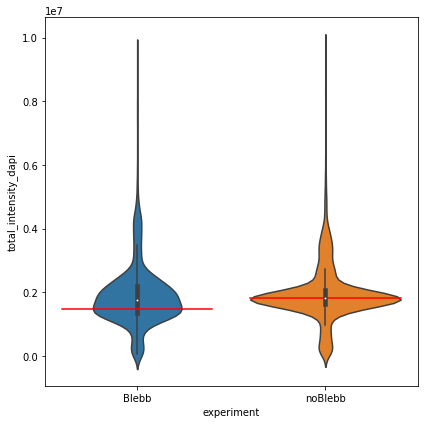

In [38]:
nga.ctrDAPI()

### Identify Single Cells
Identify single cells based on DNA marker content.

In [39]:
nga.findSingleCells()
nga.showData()

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 159.36it/s]

      cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
2023       1          745.886473           107                 40        12.9   
2024       2          768.578786            10                 14         5.7   
2025       3          620.585439           166                 47        15.4   
2026       4          892.893199            94                 36        12.4   
2027       5          862.307907           103                 38        11.6   
...      ...                 ...           ...                ...         ...   
2018      26         1031.545163           101                 44        18.1   
2019      27         1135.433005            26                 20         7.1   
2020      28         1449.540952            31                 21         7.1   
2021      29         1266.209466            79                 37        15.0   
2022      30          928.879531            62                 32        11.7   

      minor_axis  axes_rati

Check selection of single cells:

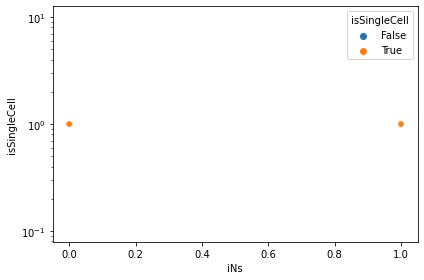

In [40]:
nga.plotData("iNs", "isSingleCell", 
                hue = "isSingleCell", alpha = 0.5, 
                y_trans = "log")

In [41]:
# Keep only single cells
nga.filterCells(expr = "isSingleCell == True")

TypeError: NuclearGame_Analyzer.filterCells() got an unexpected keyword argument 'expr'

In [42]:
nga.dim()

(4380, 42)


### Intensity Normalisation
Statistic-based normalisation of intensity data. **Options are: mode, mean, and median.** *nbins* is used only when method is *mode*. DAPI channel is not normalised.

In [43]:
nga.normIntensity(method = "mode", nbins = 100)

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 79.08it/s]


Observe data before normalisation for a channel. The red line represents the statistical method value used for normalisation.

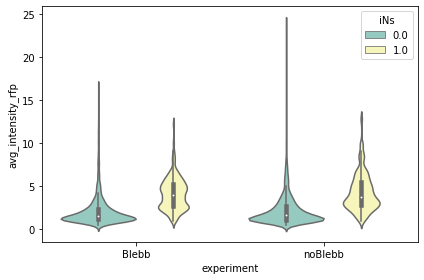

In [44]:
nga.plotData("experiment", "avg_intensity_rfp", plot_type = "violin", data_type="norm", hue="iNs")

## Data Exploration

### Linear relationships

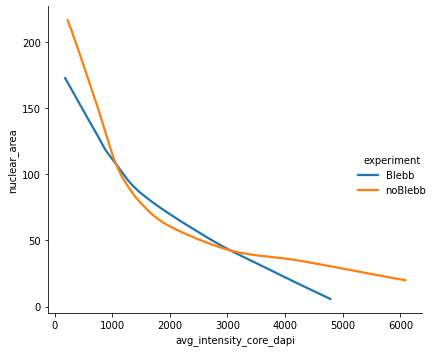

In [45]:
nga.plotData("avg_intensity_core_dapi", "nuclear_area", plot_type = "line", hue="experiment", data_type="norm")

### Dimension Reduction

In [46]:
nga.colnames()

Index(['cellID', 'avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter',
       'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity',
       'solidity', 'x_pos', 'y_pos', 'angle', 'imageID',
       'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi',
       'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi',
       'total_intensity_internal_ring_dapi',
       'total_intensity_external_ring_dapi', 'total_intensity_dapi',
       'avg_intensity_beta3', 'total_intensity_beta3', 'avg_intensity_rfp',
       'total_intensity_rfp', 'avg_intensity_laminB1',
       'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1',
       'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'dna_peaks', 'dna_dots',
       'dna_dots_size_median', 'spatial_entropy', 'beta3_group', 'rfp_group',
       'laminB1_group', 'iNs', 'experiment', 'path2ong', 'isSingleCell'],
      dtype='object')


In [47]:
nga.buildAData(excluded_features=['angle','iNs','total_intensity_core_dapi', 'total_intensity_internal_ring_dapi',
                                 'total_intensity_external_ring_dapi', 'total_intensity_dapi', 'total_intensity_rfp',
                                 'total_intensity_laminB1', 'total_intensity_beta3', 'beta3_x_rfp', 'beta3_x_laminB1',
                                 'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1'])
nga.normAData()

In [48]:
nga.showADataVars()
nga.showADataObs()

['avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter', 'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity', 'solidity', 'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi', 'avg_intensity_external_ring_dapi', 'avg_intensity_beta3', 'avg_intensity_rfp', 'avg_intensity_laminB1', 'dna_peaks', 'dna_dots', 'dna_dots_size_median', 'spatial_entropy']
['cellID', 'x_pos', 'y_pos', 'angle', 'imageID', 'total_intensity_core_dapi', 'total_intensity_internal_ring_dapi', 'total_intensity_external_ring_dapi', 'total_intensity_dapi', 'total_intensity_beta3', 'total_intensity_rfp', 'total_intensity_laminB1', 'beta3_x_rfp', 'beta3_x_laminB1', 'rfp_x_laminB1', 'beta3_x_rfp_x_laminB1', 'beta3_group', 'rfp_group', 'laminB1_group', 'iNs', 'experiment', 'path2ong', 'isSingleCell']


#### UMAP

In [49]:
nga.findNeighbours(method = "umap")
nga.findClusters(method = "leiden", res=0.6)
nga.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


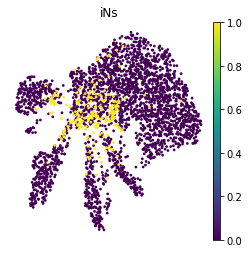

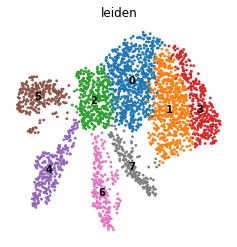

In [21]:
# Plot UMAP showing features
nga.plotDim(hue = "iNs", method="umap")
nga.plotDim(hue = "leiden", method="umap")

#### DIFFMAP

In [50]:
nga.findNeighbours(method = "gauss")
nga.findClusters(method = "leiden")
nga.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9747133  0.96359307 0.9575839  0.9453155  0.9293972
     0.927078   0.9094928  0.90526754 0.8668817  0.8638255  0.8547556
     0.85114276 0.8434773  0.8374756 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


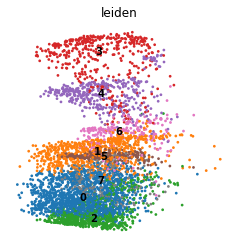

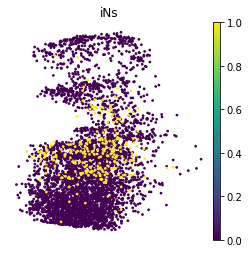

In [51]:
nga.plotDim(hue = "leiden", method="diffmap")
nga.plotDim(hue = "iNs", method="diffmap")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [57]:
nga.runPT(root = 3)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


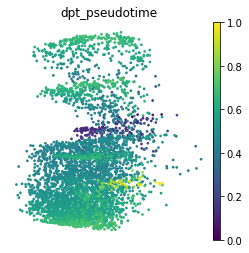

In [58]:
nga.plotDim(hue = "dpt_pseudotime", method="diffmap")

#### Stacked violin plot

In [54]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined

#### Pseudotime - heatmap

In [55]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

In [56]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

NameError: name 'sc' is not defined

### Save Object

In [ ]:
adata.write("/save/path/filename.hdf5")